# Circuits and Gates

## Overview

In TyxonQ, a quantum circuit on $n$ qubits -- which supports both noiseless and noisy simulations via Monte Carlo trajectory methods --  is created by the ``tq.Circuit(n)`` API. Here we show how to create basic circuits, apply gates to them, and compute various outputs.  

## Setup

In [24]:
import inspect
import numpy as np
import tyxonq as tq

K = tq.set_backend("numpy")

In TyxonQ the default runtime datatype is complex64, but if higher precision is required this can be set as follows

In [25]:
tq.set_dtype("complex128")

('complex128', 'float64')

## Basic Circuits and Outputs

Quantum circuits can be constructed as follows.

In [26]:
c = tq.Circuit(2)
c.h(0)
c.cnot(0, 1)
c.rx(1, theta=0.2)

**Output: state**

From this, various outputs can be computed.

The full wavefunction can be obtained via


In [27]:
c.state()

array([0.70357419+0.j        , 0.        -0.07059289j,
       0.        -0.07059289j, 0.70357419+0.j        ])

The full wavefunction can also be used to generate the reduced density matrix of a subset of the qubits


In [28]:
# reduced density matrix for qubit 1
s = c.state()
tq.quantum.reduced_density_matrix(s, cut=[0])  # cut: list of qubit indices to trace out

array([[0.5+0.00000000e+00j, 0. +2.41404955e-19j],
       [0. -2.41404955e-19j, 0.5+0.00000000e+00j]])

Amplitudes of individual basis vectors are computed by passing the corresponding bit-string value to the ``amplitude`` function. For example, the amplitude of the $\vert{10}\rangle$ basis vector is computed by


In [29]:
c.amplitude("10")

array(0.-0.07059289j)

The unitary matrix corresponding to the entire quantum circuit can also be output.

In [30]:
c.matrix()

array([[ 0.70357419+0.j        ,  0.        -0.07059289j,
         0.70357419+0.j        ,  0.        -0.07059289j],
       [ 0.        -0.07059289j,  0.70357419+0.j        ,
         0.        -0.07059289j,  0.70357419+0.j        ],
       [ 0.        -0.07059289j,  0.70357419+0.j        ,
         0.        +0.07059289j, -0.70357419+0.j        ],
       [ 0.70357419+0.j        ,  0.        -0.07059289j,
        -0.70357419+0.j        ,  0.        +0.07059289j]])

**Output: measurement**

Random samples corresponding to $Z$-measurements on all qubits can be generated using the following API, which will output a $(\text{bitstring}, \text{probability})$ tuple, comprising a binary string corresponding to the measurement outcomes of a Z measurement on all the qubits and the associated probability of obtaining that outcome.  Z measurements on a subset of qubits can be performed with the ``measure`` command

In [31]:
c.sample()

(array([1., 1.]), np.float64(0.4950166444603104))

In [32]:
c.measure(0, with_prob=True)

(array([0.]), np.float64(0.5))

In [33]:
c.measure(0, 1, with_prob=True)

(array([1., 1.]), np.float64(0.4950166444603104))

**Output: expectation**
    
Expectation values such as $\langle X_0 \rangle$, $\langle X_1 + Z_1\rangle$ or $\langle Z_0 Z_1\rangle$ can be computed via the ${\sf expectation}$ method of a circuit object

In [34]:
print(c.expectation([tq.gates.x(), [0]]))  # <X0>
print(c.expectation([tq.gates.x() + tq.gates.z(), [1]]))  # <X1 + Z1>
print(c.expectation([tq.gates.z(), [0]], [tq.gates.z(), [1]]))  # <Z0 Z1>

0j
0j
(0.9800665778412415+0j)


In [35]:
# user-defined operator

c.expectation([np.array([[3, 2], [2, -3]]), [0]])

array(0.+0.j)

While expectations of products of Pauli operators, e.g. $\langle Z_0 X_1\rangle$ can be computed using ``c.expectation`` as above, TensorCircuit provides another way of computing such expressions which may be more convenient for longer Pauli strings, and longer Pauli strings can similarly be computed by providing lists of indices corresponding to the qubits that the $X,Y,Z$ operators act on.

In [36]:
c.expectation_ps(x=[1], z=[0])

array(0.-5.94767735e-18j)

## Built-in Gates

TyxonQ provides support for a wide variety of commonly encountered quantum gates.  The full list is as below.

In [37]:
for g in tq.Circuit.sgates:
    gf = getattr(tq.gates, g)
    print(g)
    print(tq.gates.matrix_for_gate(gf()))

i
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
x
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
y
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
z
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
h
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
t
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]
s
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
td
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710677-0.70710677j]]
sd
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]
wroot
[[ 0.70710678+0.j  -0.5       -0.5j]
 [ 0.5       -0.5j  0.70710678+0.j ]]
cnot
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
cz
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
swap
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
cy
[[1.+0.j 

In [38]:
for g in tq.Circuit.vgates:
    print(g, inspect.signature(getattr(tq.gates, g).f))

r (theta: float = 0, alpha: float = 0, phi: float = 0) -> tyxonq.gates.Gate
cr (theta: float = 0, alpha: float = 0, phi: float = 0) -> tyxonq.gates.Gate
u (theta: float = 0, phi: float = 0, lbd: float = 0) -> tyxonq.gates.Gate
cu (*args: Any, **kws: Any) -> Any
rx (theta: float = 0) -> tyxonq.gates.Gate
ry (theta: float = 0) -> tyxonq.gates.Gate
rz (theta: float = 0) -> tyxonq.gates.Gate
phase (theta: float = 0) -> tyxonq.gates.Gate
rxx (*, unitary: Any = array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]]), theta: float, half: bool = True, name: str = 'none') -> tyxonq.gates.Gate
ryy (*, unitary: Any = array([[ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]), theta: float, half: bool = True, name: str = 'none') -> tyxonq.gates.Gate
rzz (*, unitary: Any = array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0., -0.],
    

Also, we have built-in matrices as

In [39]:
for name in dir(tq.gates):
    if name.endswith("_matrix"):
        print(name, ":\n", getattr(tq.gates, name))

_cnot_matrix :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
_cy_matrix :
 [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]]
_cz_matrix :
 [[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]
_fredkin_matrix :
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
_h_matrix :
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
_i_matrix :
 [[1. 0.]
 [0. 1.]]
_ii_matrix :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
_ix_matrix :
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
_iy_matrix :
 [[0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]]
_iz_matrix :
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0. -0.]


**Arbitrary unitaries.** User-defined unitary gates may be implemented by specifying their matrix elements as an array. As an example, the unitary $S = \begin{pmatrix} 1 & 0 \\  0 & i\end{pmatrix}$ -- which can also directly be added by calling ``c.s()``
can be implemented as

In [40]:
c.unitary(0, unitary=np.array([[1, 0], [0, 1j]]), name="S")

# the optional name argument specifies how this gate is displayed when the circuit is output to \LaTeX

**Exponential gates.** Gates of the form $e^{i\theta G}$ where matrix $G$ satisfies $G^2 = I$ admit a fast implementation via the ``exp1`` command, e.g., the two-qubit gate $e^{i\theta Z\otimes Z}$ acting on qubits $0$ and $1$

In [41]:
c.exp1(0, 1, theta=0.2, unitary=tq.gates._zz_matrix)

General exponential gates, where $G^2\neq 1$ can be implemented via the ``exp`` command:

In [42]:
c.exp(0, theta=0.2, unitary=np.array([[2, 0], [0, 1]]))

**Non-unitary gates.**
TyxonQ also supports the application of non-unitary gates, either by providing a non-unitary matrix as the argument to  ``c.unitary`` or by supplying a complex angle $\theta$ to an exponential gate.

In [43]:
c.unitary(0, unitary=np.array([[1, 2], [2, 3]]), name="non_unitary")
c.exp1(0, theta=0.2 + 1j, unitary=tq.gates._x_matrix)

Note that the non-unitary gates will lead to an output state that is no longer normalized since normalization is often unnecessary and takes extra time which can be avoided.

## Specifying the Input State and Composing Circuits

By default, quantum circuits are applied to the initial all zero product state.  Arbitrary initial states can be set by passing an array containing the input state amplitudes to the optional ``inputs`` argument of ``tq.Circuit``.  For example, the  maximally entangled state $\frac{\vert{00}\rangle+\vert{11}\rangle}{\sqrt{2}}$ can be input as follows.

In [44]:
c1 = tq.Circuit(2, inputs=np.array([1, 0, 0, 1] / np.sqrt(2)))

Circuits that act on the same number of qubits can be composed together via the ``c.append()`` or ``c.prepend()`` commands. With ``c1`` defined as above, we can create a new circuit ``c2`` and then compose them together:

In [45]:
c2 = tq.Circuit(2)
c2.cnot(1, 0)

c3 = c1.append(c2)
c3.state()

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

## Circuit Transformation and Visualization

``tq.Circuit`` objects can be converted to and from Qiskit ``QuantumCircuit`` objects.

In [46]:
c = tq.Circuit(2)
c.H(0)
c.cnot(1, 0)
cq = c.to_qiskit()

In [47]:
c1 = tq.Circuit.from_qiskit(cq)

In [48]:
# print the quantum circuit intermediate representation

c1.to_qir()

[{'gatef': h,
  'gate': Gate(
      name: 'h',
      tensor:
          array([[ 0.70710678+0.j,  0.70710678+0.j],
                 [ 0.70710678+0.j, -0.70710678+0.j]]),
      edges: [
          Edge('cnot'[3] -> 'h'[0] ),
          Edge('h'[1] -> 'qb-0'[0] )
      ]),
  'index': (0,),
  'name': 'h',
  'split': None,
  'mpo': False},
 {'gatef': cnot,
  'gate': Gate(
      name: 'cnot',
      tensor:
          array([[[[1.+0.j, 0.+0.j],
                   [0.+0.j, 0.+0.j]],
          
                  [[0.+0.j, 1.+0.j],
                   [0.+0.j, 0.+0.j]]],
          
          
                 [[[0.+0.j, 0.+0.j],
                   [0.+0.j, 1.+0.j]],
          
                  [[0.+0.j, 0.+0.j],
                   [1.+0.j, 0.+0.j]]]]),
      edges: [
          Edge(Dangling Edge)[0],
          Edge(Dangling Edge)[1],
          Edge('cnot'[2] -> 'qb-1'[0] ),
          Edge('cnot'[3] -> 'h'[0] )
      ]),
  'index': (1, 0),
  'name': 'cnot',
  'split': None,
  'mpo': False}]

There are two ways to visualize quantum circuits generated in TyxonQ.  The first is to use ``c.tex()`` to get \Latex quantikz commands.


In [49]:
c.tex()

'\\begin{quantikz}\n\\lstick{$\\ket{0}$}&\\gate{h} &\\targ{} &\\qw \\\\\n\\lstick{$\\ket{0}$}&\\qw &\\ctrl{-1} &\\qw \n\\end{quantikz}'

The second method uses the draw function from [qiskit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html).

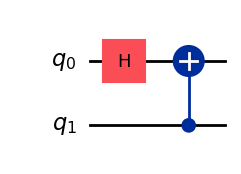

In [50]:
c.draw(output="mpl")